Download the IRIS dataset using the method sklearn.dataset.load_iris. 
The load_iris method returns a dictionary with the following keys:
    data which contains a matrix with the sepal and petal's lengths and widths, 
    feature_names with the corresponding list of strings for the data names, 
    target the corresponding flower label id,
    target_names the list of strings for the flower names.

Load data in a pandas DataFrame. 
This should include the data values and the flower label. 
Print the DataFrame to screen. 

Given that the label column is a categorical feature, we should convert it to a one-hot encoding. 
Perform this one-hot encoding operation by replacing the label column with three new columns:
    label_setosa, label_versicolor, label_virginica.

Extract 80% of the data for training and keep 20% for test, using the DataFrame.sample method.




In [24]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn.datasets import load_iris

iris=load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)#picks iris['data'] values and puts them in to columns labeled with iris['feature_names']
#put labels instead of data number, label values are in iris.target, and corresponding name in iiris.target.names
df['label']=iris.target_names[iris.target]
print(df)
#sns.pairplot(df, hue='label')
#plt.show()
labelOH=pd.get_dummies(df['label'], prefix="label") #get_dummies performs automatic one hot encoding on the selected column, naming the resulting columns after a prefix
#concatenate the one hot encoded label into the dataframe on the first row
df=pd.concat([df,labelOH], axis=1)
# drop old label
df.drop(['label'], axis=1, inplace=True)
print("dataframe after one hot encoding:")
print(df)

#extract random 80% of data with a fixed seed (1)
train=df.sample(frac=0.8, random_state=1)
test=df.drop(train.index)

#make x and y
x_train = train[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

# Convert DataFrame into np array
y_train = train[['label_setosa', 'label_versicolor', 'label_virginica']]


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

         label  
0       se

Define a sequential model with 3 output nodes with softmax activation function.

Perform a fit using Adam and the categorical cross-entropy loss function for 200 epochs,


validation split of 40% and batch size of 32. Plot the learning curves (loss vs epochs) 


for the training and validation datasets.


Modify the previous point in order to use early stopping on the validation loss with patience=10.
Plot the learning curves and check the stopping epoch.

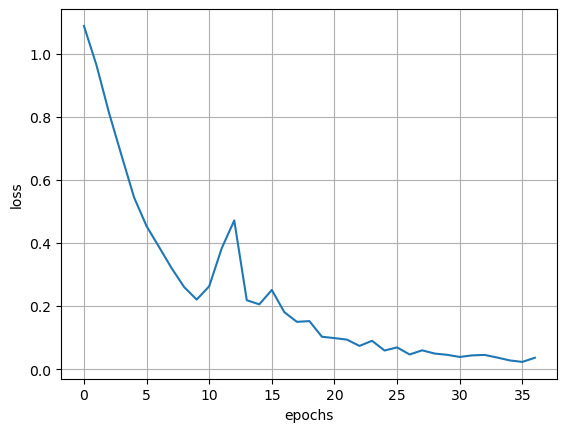

In [25]:

epochs=200

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
history=model.fit(x_train,y_train,epochs=epochs, batch_size=32, validation_split=0.4, verbose=0, 
                   callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
        tf.keras.callbacks.TensorBoard(log_dir='./log'),
    ],)

losses=history.history['loss']
N=np.arange(len(losses))

plt.plot(N,losses)
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

#early stopping stops the validation if the validation's loss stops decreasing






"""We provide numpy arrays for daily measurements performed in blocks of 10 days. 
The data was already filtered and normalized. 
Download the following datasets and check the corresponding sizes:

# for the training set
wget https://raw.githubusercontent.com/scarrazza/DL2025/main/Lecture_6/training_data.npy
wget https://raw.githubusercontent.com/scarrazza/DL2025/main/Lecture_6/training_label.npy
# for the test set
wget https://raw.githubusercontent.com/scarrazza/DL2025/main/Lecture_6/test_data.npy
wget https://raw.githubusercontent.com/scarrazza/DL2025/main/Lecture_6/test_label.npy
Build and train an LSTM model using Adam with MSE loss, 25 epochs, batch size 32. Print the final MSE for the test set.

Plot the following quantities: 
training and test data vs days, 
the LSTM predictions for the test data, 
the LSTM predictions for the first 100 days,
the residual (y_test - prediction), 
and the scatter plot between the true test data vs predictions."""

(1490, 10, 1)
(1490, 1)
(490, 10, 1)
(490, 1)
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.0039 - loss: 0.0018   
final test loss=0.0019314554519951344
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MSE = 0.0019314555502041146


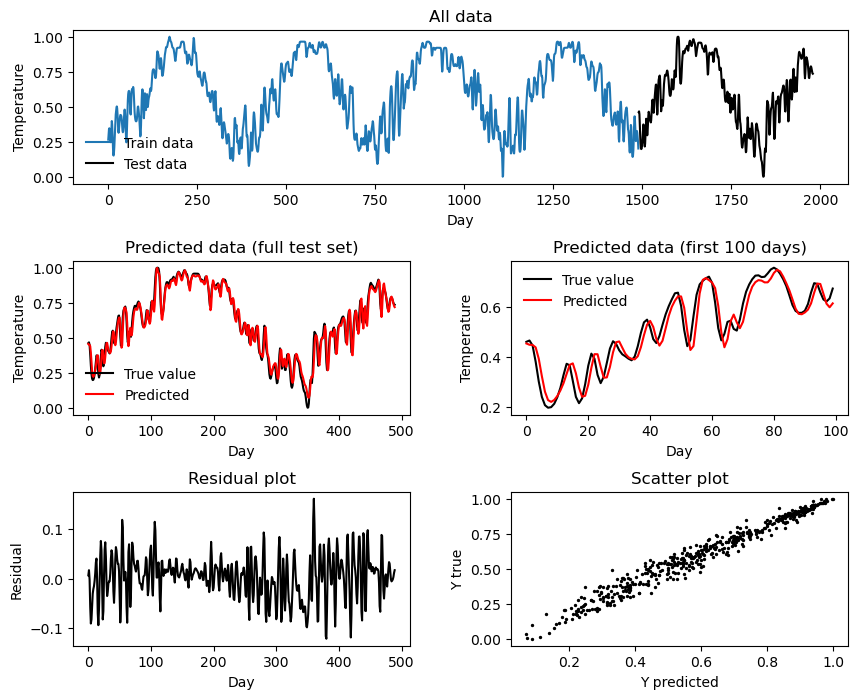

In [42]:

import numpy as np
x_train=np.load("training_data.npy")
y_train=np.load("training_label.npy")
x_test=np.load("test_data.npy")
y_test=np.load("test_label.npy")
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

#build lstm model
model=tf.keras.models.Sequential([tf.keras.layers.LSTM(30, activation='relu'),#RNN LSTM layer with 30 hidden units
                                  tf.keras.layers.Dense(1)]) #output layer
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
epochs=25
history=model.fit(x_train, y_train, epochs=epochs, batch_size=32, verbose=0)
#test model
test=model.evaluate(x_test,y_test, return_dict=True)
print(f"final test loss={test['loss']}")

#now the plotting part
y_predicted = model.predict(x_test)


# Show results
plt.figure(figsize=(10,8))

plt.subplot(3, 1, 1)
plt.plot(y_train, label='Train data')
plt.plot(range(len(y_train), len(y_train)+len(y_test)), y_test, 'k', label='Test data')
plt.legend(frameon=False)
plt.ylabel("Temperature")
plt.xlabel("Day")
plt.title("All data")

plt.subplot(3, 2, 3)
plt.plot(y_test, color='k', label = 'True value')
plt.plot(y_predicted, color='red', label = 'Predicted')
plt.legend(frameon=False)
plt.ylabel("Temperature")
plt.xlabel("Day")
plt.title("Predicted data (full test set)")

plt.subplot(3, 2, 4)
plt.plot(y_test[0:100], color='k', label = 'True value')
plt.plot(y_predicted[0:100], color = 'red', label='Predicted')
plt.legend(frameon=False)
plt.ylabel("Temperature")
plt.xlabel("Day")
plt.title("Predicted data (first 100 days)")

plt.subplot(3, 2, 5)
plt.plot(y_test-y_predicted, color='k')
plt.ylabel("Residual")
plt.xlabel("Day")
plt.title("Residual plot")

plt.subplot(3, 2, 6)
plt.scatter(y_predicted, y_test, s=2, color='black')
plt.ylabel("Y true")
plt.xlabel("Y predicted")
plt.title("Scatter plot")

mse = np.mean(np.square(y_test - y_predicted))
print(f"MSE = {mse}")

plt.subplots_adjust(hspace = 0.5, wspace=0.3)
plt.show()